# ADVANCED DATA SCIENCE CAPSTONE PROJECT

## APS SYSTEM FAILURE PREDICTION IN SCANIA TRUCKS

## Data Set

The data set consists of data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurized air that is utilized in various functions in a truck, such as braking and gear changes. The data sets' positive class consists of component failures for a specific component of the APS system. The negative class consists of trucks with failures for components not related to the APS. The data consists of a subset of all available data, selected by experts. The training set contains 60000 examples in total in which 59000 belong to the negative class and 1000 positive class. The test set contains 16000 examples. There are 171 attributes per record. It was imported from the UCI ML Repository https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks

## Use Case 

**Create a model that accuartely predict the APS system failures in Scania Trucks and reduce the cost for failures**

Total cost = Cost_1 *  Number of Instances of False Positive Cases 
                                                    +
             Cost_2  *  Number of Instances of False Negative Cases
                  
     
Cost_1 = $10 (The cost that an unnecessary check needs to be done by an mechanic at an workshop)

Cost_2 = $ 500 (The cost of missing a faulty truck, which may cause a breakdown)


## Extract, Load and Transform Data

In [1]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00421/aps_failure_training_set.csv
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00421/aps_failure_test_set.csv

--2019-02-05 09:28:23--  https://archive.ics.uci.edu/ml/machine-learning-databases/00421/aps_failure_training_set.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44669194 (43M) [text/csv]
Saving to: ‘aps_failure_training_set.csv.6’

100%[======================================>] 44,669,194  32.0MB/s   in 1.3s   

2019-02-05 09:28:25 (32.0 MB/s) - ‘aps_failure_training_set.csv.6’ saved [44669194/44669194]

--2019-02-05 09:28:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/00421/aps_failure_test_set.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11943558 (11M) [text/csv]
Saving to: ‘aps_failure_test_set.csv.7’

100%[====================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv("aps_failure_training_set.csv", skiprows=20)
test = pd.read_csv("aps_failure_test_set.csv", skiprows=20)

In [3]:
print("shape of train data set:")
print(train.shape)
train.head()

shape of train data set:
(60000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
print("shape of test data set:")
print(test.shape)
test.head()

shape of test data set:
(16000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [5]:
train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
class,60000,2,neg,59000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aa_000,60000,NaN,NaN,NaN,59336.5,145430,0,834,30776,48668,2.74656e+06
ab_000,60000,30,na,46329,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ac_000,60000,2062,0,8752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ad_000,60000,1887,na,14861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ae_000,60000,334,0,55543,NaN,NaN,NaN,NaN,NaN,NaN,NaN
af_000,60000,419,0,55476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ag_000,60000,155,0,59133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ag_001,60000,618,0,58587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ag_002,60000,2423,0,56181,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train.isnull().any()

class     False
aa_000    False
ab_000    False
ac_000    False
ad_000    False
ae_000    False
af_000    False
ag_000    False
ag_001    False
ag_002    False
ag_003    False
ag_004    False
ag_005    False
ag_006    False
ag_007    False
ag_008    False
ag_009    False
ah_000    False
ai_000    False
aj_000    False
ak_000    False
al_000    False
am_0      False
an_000    False
ao_000    False
ap_000    False
aq_000    False
ar_000    False
as_000    False
at_000    False
          ...  
dl_000    False
dm_000    False
dn_000    False
do_000    False
dp_000    False
dq_000    False
dr_000    False
ds_000    False
dt_000    False
du_000    False
dv_000    False
dx_000    False
dy_000    False
dz_000    False
ea_000    False
eb_000    False
ec_00     False
ed_000    False
ee_000    False
ee_001    False
ee_002    False
ee_003    False
ee_004    False
ee_005    False
ee_006    False
ee_007    False
ee_008    False
ee_009    False
ef_000    False
eg_000    False
Length: 171, dtype: bool

In [7]:
train.notna().sum()

class     60000
aa_000    60000
ab_000    60000
ac_000    60000
ad_000    60000
ae_000    60000
af_000    60000
ag_000    60000
ag_001    60000
ag_002    60000
ag_003    60000
ag_004    60000
ag_005    60000
ag_006    60000
ag_007    60000
ag_008    60000
ag_009    60000
ah_000    60000
ai_000    60000
aj_000    60000
ak_000    60000
al_000    60000
am_0      60000
an_000    60000
ao_000    60000
ap_000    60000
aq_000    60000
ar_000    60000
as_000    60000
at_000    60000
          ...  
dl_000    60000
dm_000    60000
dn_000    60000
do_000    60000
dp_000    60000
dq_000    60000
dr_000    60000
ds_000    60000
dt_000    60000
du_000    60000
dv_000    60000
dx_000    60000
dy_000    60000
dz_000    60000
ea_000    60000
eb_000    60000
ec_00     60000
ed_000    60000
ee_000    60000
ee_001    60000
ee_002    60000
ee_003    60000
ee_004    60000
ee_005    60000
ee_006    60000
ee_007    60000
ee_008    60000
ee_009    60000
ef_000    60000
eg_000    60000
Length: 171, dtype: int6

In [8]:
df = train.dropna()
df.shape

(60000, 171)

Since there is no change in the number of observation, we need to replace all "na" collumns to numpy.nan column to be recognised by the pandas dropna function

In [9]:
train.replace('na',np.nan,inplace = True)
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [11]:
train.isna().any().sum()

169

See now pandas can recognize the "na" columns

In [12]:
# Fill nan values with zero
df = train.fillna(0)
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,0,0,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,0,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,0,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [13]:
df.isna().any().sum()

0

In [14]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
class,60000,2,neg,59000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aa_000,60000,NaN,NaN,NaN,59336.5,145430,0,834,30776,48668,2.74656e+06
ab_000,60000,30,0,46329,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ac_000,60000,2062,0,8752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ad_000,60000,1887,0,14861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ae_000,60000,334,0,55543,NaN,NaN,NaN,NaN,NaN,NaN,NaN
af_000,60000,419,0,55476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ag_000,60000,155,0,59133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ag_001,60000,618,0,58587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ag_002,60000,2423,0,56181,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next we need to convert all columns with object data type to numerical type for further exploration and model buliding.


First we will replace all "neg" observation with 0 and all "pos" observation with 1 in the "class" feature column.

In [15]:
def get_result_out(df):
    #Get result field out and replace neg with 0 and pos with 1
    result = df["class"]
    result.replace('neg',0,inplace = True)
    result.replace('pos',1,inplace = True)
    return df

In [16]:
df = get_result_out(df)
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,0,0,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,0,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,0,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


Then we will change the data type of total data set to numerical data type.

In [17]:
train_df = df.astype(float)
train_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,76698.0,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(171)
memory usage: 78.3 MB


So we will combine all above steps to one function and process the test data set to get the processed test data set.

In [19]:
def pre_process(df):
    df1 = df.replace('na', np.nan, inplace = True)
    df2 = df.fillna(0)
    #Get result field out and replace neg with 0 and pos with 1
    result = df["class"]
    df3 = result.replace('neg',0,inplace = True)
    df4 = result.replace('pos',1,inplace = True)
    df_numeric = df.astype(float)
    return df_numeric
    

In [20]:
test_df = pre_process(test)
test_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,60.0,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0.0,82.0,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0.0,66002.0,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0.0,59816.0,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0.0,1814.0,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


## Exploratory Data Analysis 

In [21]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
class,60000.0,1.666667e-02,1.280202e-01,0.0,0.0,0.00,0.00,1.000000e+00
aa_000,60000.0,5.933650e+04,1.454301e+05,0.0,834.0,30776.00,48668.00,2.746564e+06
ab_000,60000.0,1.625000e-01,1.687318e+00,0.0,0.0,0.00,0.00,2.040000e+02
ac_000,60000.0,3.362258e+08,7.767625e+08,0.0,8.0,120.00,848.00,2.130707e+09
ad_000,60000.0,1.434071e+05,3.504525e+07,0.0,0.0,42.00,292.00,8.584298e+09
ae_000,60000.0,6.535000e+00,1.581479e+02,0.0,0.0,0.00,0.00,2.105000e+04
af_000,60000.0,1.054820e+01,2.053871e+02,0.0,0.0,0.00,0.00,2.007000e+04
ag_000,60000.0,2.191577e+02,2.036364e+04,0.0,0.0,0.00,0.00,3.376892e+06
ag_001,60000.0,9.648104e+02,3.400891e+04,0.0,0.0,0.00,0.00,4.109372e+06
ag_002,60000.0,8.509771e+03,1.494818e+05,0.0,0.0,0.00,0.00,1.055286e+07


Make sample data set for ploting the data set

In [23]:
train_df_sample = train.sample(n=6000)
train_df_sample.shape

(6000, 171)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


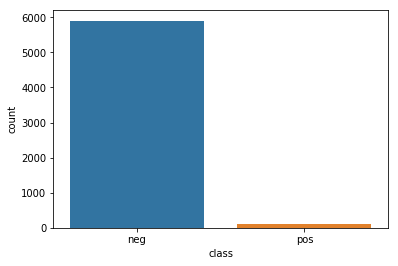

In [24]:
sns.countplot(x='class', data=train_df_sample)

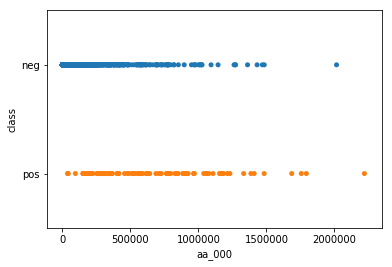

In [25]:
sns.stripplot(x="aa_000", y="class", data=train_df_sample)

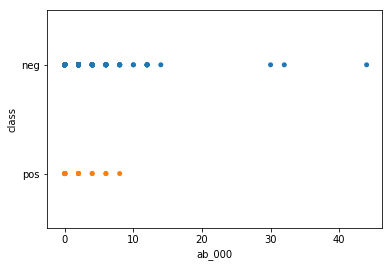

In [26]:
sns.stripplot(x="ab_000", y="class", data=train_df_sample)

# Deep Learning Model with Keras Library

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.preprocessing import sequence
from keras.models import load_model
from keras.layers import Dense
from keras.layers import Input, LSTM
from keras.models import Model
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

train = pd.read_csv("aps_failure_training_set.csv", skiprows=20)
test = pd.read_csv("aps_failure_test_set.csv", skiprows=20)


def pre_process(df):
    df.replace('na', np.nan, inplace = True)
    df.fillna(0, inplace = True)
    #Get result field out and replace neg with 0 and pos with 1
    result = df["class"]
    df3 = result.replace('neg',0,inplace = True)
    df4 = result.replace('pos',1,inplace = True)
    df_numeric = df.astype(float)
    return df_numeric



df = pre_process(train)
test_df = pre_process(test)

X = df.drop("class", axis=1)
Y = df["class"]

X_test = test_df.drop("class", axis=1)
Y_test = test_df["class"]


batch_size = 64
epochs = 120

# Baseline model for the neural network. We choose a hidden layer of 10 neurons. The lesser number of neurons helps to eliminate the redundancies in the data and select the more important features.
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=170, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    #compile model. We use the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Evaluate model using standardized dataset. 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=epochs, batch_size=batch_size, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Using TensorFlow backend.


Results: 99.23% (0.13%)


### Fit model on training data set and predict on test data set

In [28]:
prediction = pipeline.fit(X, Y)

test_prediction = pipeline.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, test_prediction)
print("accuracy: %.2f%% " % (accuracy.mean()*100))

accuracy: 99.02% 


### Evaluate Deep Learning Model Performance

classification report...
             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99     15625
        1.0       0.83      0.73      0.78       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix plot...


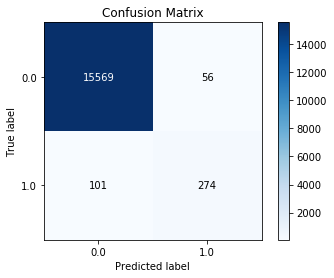

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, make_scorer
import scikitplot as skplt
y_test = np.array(test_df["class"])
y_pred = test_prediction
print("classification report...")
print(classification_report(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion matrix plot...")
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.show()


### Total Cost of Deep Learning Model

In [31]:
print("Total Cost for the model:",(10*fp + 500*fn))

Total Cost for the model: 51060


**Eventhough accuarcy is more than 99%,  Total cost of the model is very high. So we cannot accept deep learning classifier as our solution.**

**We will try Logistic Regression Classifier with Apache Spark ML**

# Machine Learning Model with Spark ML
## Logistic Regression Classifier

In [32]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from pyspark.ml.feature import PCA
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import Normalizer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
import pyspark.sql.functions as f
from pyspark.sql.functions import col

# Load Data Set to pandas
train = pd.read_csv("aps_failure_training_set.csv", skiprows=20)
test = pd.read_csv("aps_failure_test_set.csv", skiprows=20)

# Create Spark data frame from panda data frame
spark_df = sqlContext.createDataFrame(train)
spark_test_df = sqlContext.createDataFrame(test)

# Create function class attribute processing
def index_processor(df):
    indexer = StringIndexer(inputCol="class", outputCol="label")
    indexed = indexer.fit(df).transform(df)
    return indexed

# Create function for vector assembler processing of features
def vector_assembler_processor(indexed):
    indexed_1 = indexed
    vector_features = indexed_1.drop('class', 'label').columns
    vectorAssembler = VectorAssembler(inputCols= vector_features, outputCol="features")
    expr = [col(c).cast("Double").alias(c)
            for c in vectorAssembler.getInputCols()]
    indexed_1 = indexed_1.select(*expr)
    indexed_1 = indexed_1.fillna(0)
    features_vectorized = vectorAssembler.transform(indexed_1)
    return features_vectorized  


# Make final data frame to train the model
def make_df_train(features_vectorized, indexed):
    df_train = features_vectorized.select("features")
    label = indexed.select("label")
    df_train = df_train.withColumn('row_index', f.monotonically_increasing_id())
    label=label.withColumn('row_index', f.monotonically_increasing_id())
    df_train = df_train.join(label, on=["row_index"]).sort("row_index").drop("row_index")
    return df_train

# Compile all above function to one function for easy processing of data set
def processor(df):
    indexed = index_processor(df)
    features_vectorized = vector_assembler_processor(indexed)
    df_processed = make_df_train(features_vectorized, indexed)
    return df_processed

# Pre process training data frame
df_train = processor(spark_df)

# Create model
lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
model = lr.fit(df_train)

# Traing the model
prediction = model.transform(df_train)
print("Prediction schema")
prediction.printSchema()

# Evaluate the model performance on traing data set
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
binEval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("label")
print("Evaluation score on training set.....")    
print(binEval.evaluate(prediction))

Prediction schema
root
 |-- features: vector (nullable = true)
 |-- label: double (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = true)

Evaluation score on training set.....
0.9833333333333333


## Prediction on Test Set

In [33]:
# Pre process test data frame
df_test = processor(spark_test_df) 

# Make prediction on the test data frame
test_prediction = model.transform(df_test)
# Evaluate model performance on test data frame
print("Evaluation score on test set.....")
print(binEval.evaluate(test_prediction))

Evaluation score on test set.....
0.9765625


## Evaluate Model Performance 

In [34]:
# Import required libraries
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, make_scorer
# import scikitplot as skplt
# from tqdm import tqdm


In [35]:
# Create numpy arrays of True labels and predicted labels
y_test_norm = np.array(df_test.select("label").collect())
y_pred_norm = np.array(test_prediction.select("label").collect())

classification report...
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     15625
        1.0       1.00      1.00      1.00       375

avg / total       1.00      1.00      1.00     16000

Confusion matrix plot...


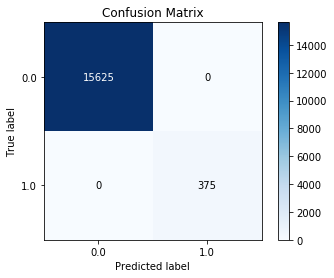

In [36]:
# Create classification report and confusion matrix plot 
print("classification report...")
print(classification_report(y_test_norm, y_pred_norm))
tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
print("Confusion matrix plot...")
skplt.metrics.plot_confusion_matrix(y_test_norm, y_pred_norm, normalize=False)
plt.show()



## Predict Total Cost of Model

In [37]:
print("Total Cost for the model:", (10*fp + 500*fn))

Total Cost for the model: 0


**Since logistic regression classifier reducing the cost to zero, we can select this model as our solution.**

**But we will also try to see feture engineering effect by normalizing the data set.**

# Faeture Engineering

In [38]:
# Let us try to do feature engineering on Spark ML logistic regression model
def index_processor(df):
    indexer = StringIndexer(inputCol="class", outputCol="label")
    indexed = indexer.fit(df).transform(df)
    return indexed

def vector_assembler_processor(indexed):
    indexed_1 = indexed
    vector_features = indexed_1.drop('class', 'label').columns
    vectorAssembler = VectorAssembler(inputCols= vector_features, outputCol="features")
    expr = [col(c).cast("Double").alias(c)
            for c in vectorAssembler.getInputCols()]
    indexed_1 = indexed_1.select(*expr)
    indexed_1 = indexed_1.fillna(0)
    features_vectorized = vectorAssembler.transform(indexed_1)
    return features_vectorized  


def df_normalizer(features_vectorized):
    normalizer = Normalizer(inputCol="features", outputCol="features_norm", p=1.0)
    l1NormData = normalizer.transform(features_vectorized)
    return l1NormData


def make_df_norm(features_vectorized_norm, indexed):
    df_norm = features_vectorized_norm.select("features_norm")
    label = indexed.select("label")
    df_norm = df_norm.withColumn('row_index', f.monotonically_increasing_id())
    label=label.withColumn('row_index', f.monotonically_increasing_id())
    df_norm = df_norm.join(label, on=["row_index"]).sort("row_index").drop("row_index")
    return df_norm


def processor_norm(df):
    indexed = index_processor(df)
    features_vectorized = vector_assembler_processor(indexed)
    features_vectorized_norm = df_normalizer(features_vectorized)
    df_processed = make_df_norm(features_vectorized_norm, indexed)
    return df_processed   


df_train_norm = processor_norm(spark_df)

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, labelCol="label", featuresCol="features_norm")
model_norm = lr.fit(df_train_norm)
prediction_norm = model_norm.transform(df_train_norm)
print("Evaluation score on normalized training set")
print(binEval.evaluate(prediction_norm))

Evaluation score on normalized training set
0.9833333333333333


## Prediction on normalized test set

In [39]:
df_test_norm = processor_norm(spark_test_df)
prediction_norm_test = model_norm.transform(df_test_norm)
print("Evaluation score on normalized test set")
print(binEval.evaluate(prediction_norm_test))

Evaluation score on normalized test set
0.9765625


## Model Evaluation

classification report...
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     15625
        1.0       1.00      1.00      1.00       375

avg / total       1.00      1.00      1.00     16000

Confusion matrix plot...


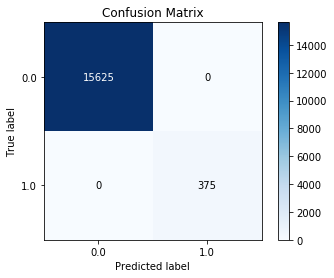

In [40]:
y_test_norm = np.array(df_test_norm.select("label").collect())
y_pred_norm = np.array(prediction_norm_test.select("label").collect())
print("classification report...")
print(classification_report(y_test_norm, y_pred_norm))
tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
print("Confusion matrix plot...")
skplt.metrics.plot_confusion_matrix(y_test_norm, y_pred_norm, normalize=False)
plt.show()


## Total Cost of the model

In [42]:
print("Total Cost for the model:", 10*fp + 500*fn)

Total Cost for the model: 0


## Save model Selected Model Spark ML Logistics regression Classifier

In [43]:
model.save('spark_lr_model_2.h5')